## Part 1: Preprocessing

### Dependencies

In [48]:
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History


#### Style

In [2]:
sns.set_style('darkgrid')

### Data

In [3]:
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  HourlyRate  \
0          2  Life Sciences                        2          94   
1          1  Life Sciences                        3          61   
2          2          Other                        4          92   
3          4  Life Sciences                        4          56   
4          1        Medical                        1          40   

   JobInvolvement  ...  PerformanceRating RelationshipSatisfaction  \
0               3  ...                  3                        1   
1               2  ...                  4                        4   
2               2  ...                  3                        2   
3               3  ...                  3                        3   
4               3  ...                  3                        4   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                 8                      0               1   
1                 1                10                      3               3   
2                 0                 7                      3               3   
3                 0                 8                      3               3   
4                 1                 6                      3               3   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 27 columns]

### EDA

In [4]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  NumCompaniesWorked      

### Features

#### Categorical

In [5]:
categorical_features = ['Attrition',  'BusinessTravel', 'Department','Education', 'EducationField', 
                        'EnvironmentSatisfaction','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                        'MaritalStatus', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance','OverTime']

for category in categorical_features:
    attrition_df[category] = attrition_df[category].astype('category')

### Viz

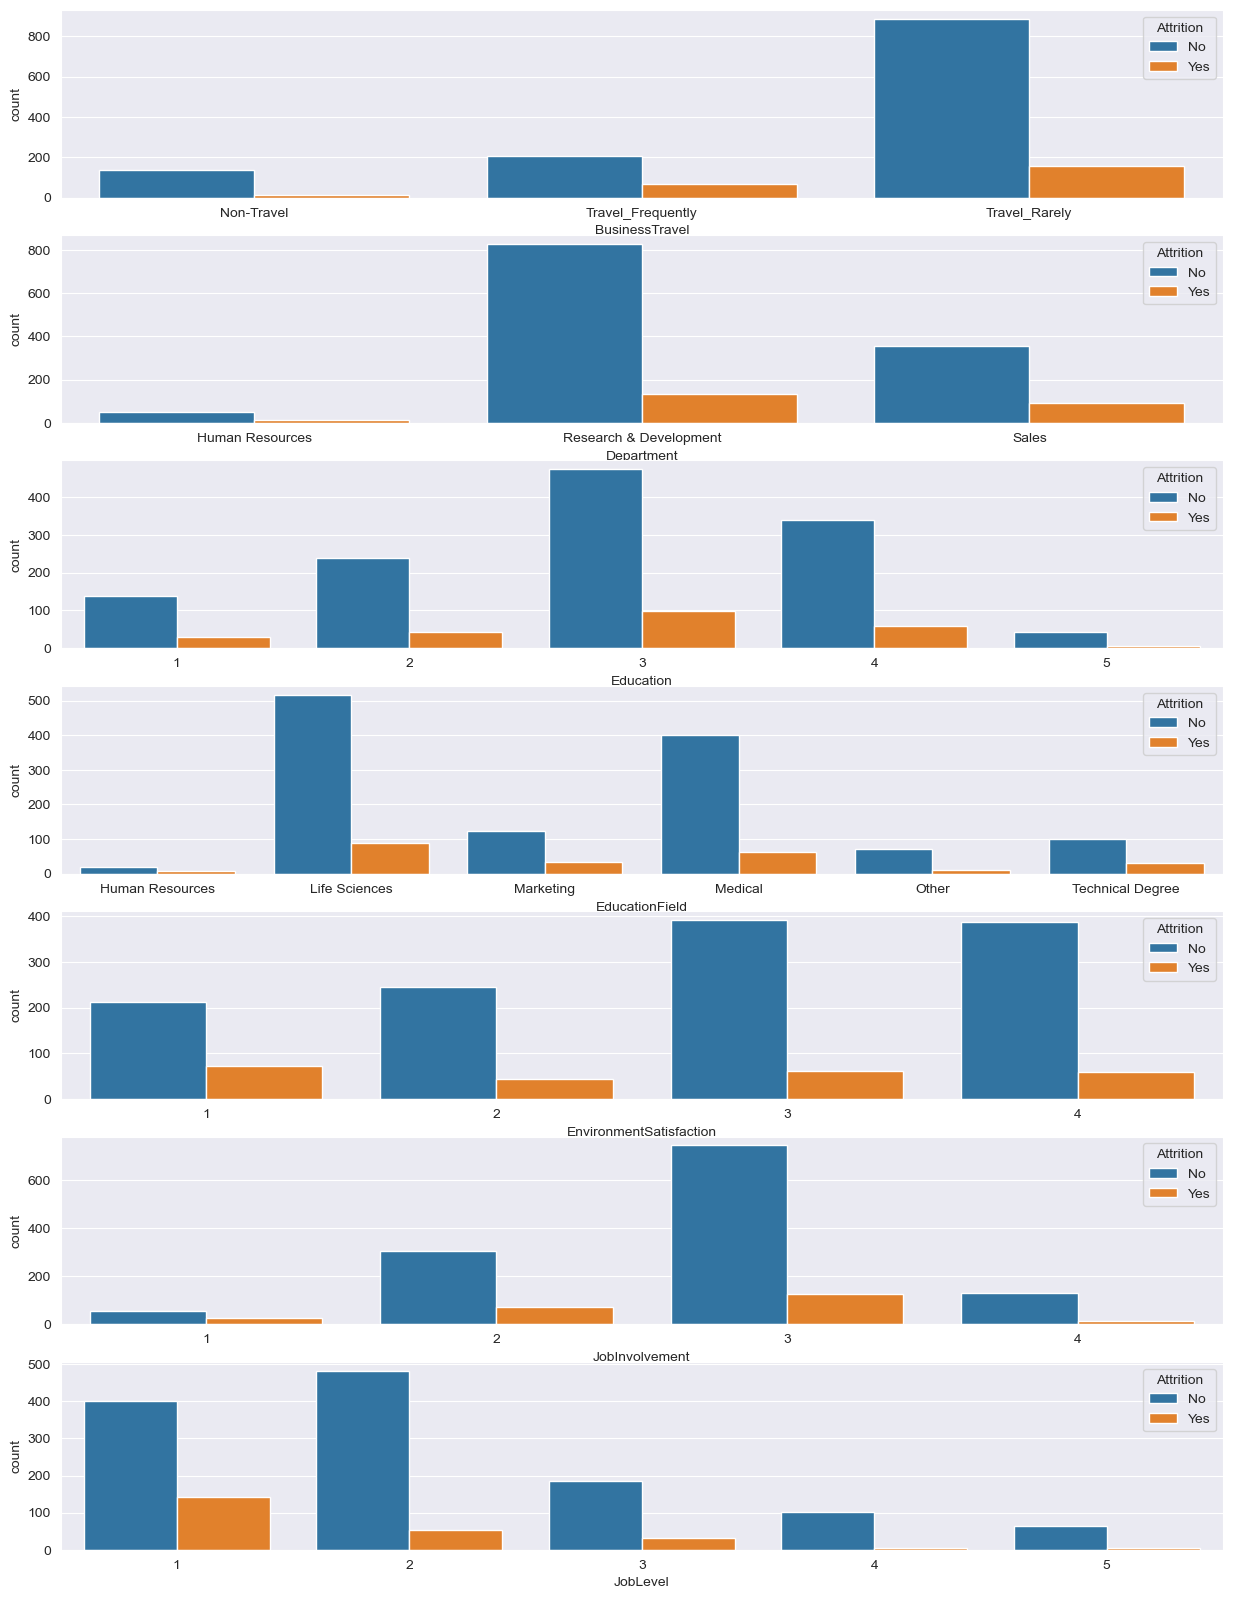

In [6]:
fig,ax = plt.subplots(nrows = 7,figsize = (15,20))

cats_1_7 = categorical_features[1:8]
for category in cats_1_7 :
    indx = cats_1_7.index(category)
    sns.countplot(data = attrition_df,
              x = category,
              ax = ax[indx],
              hue = 'Attrition')


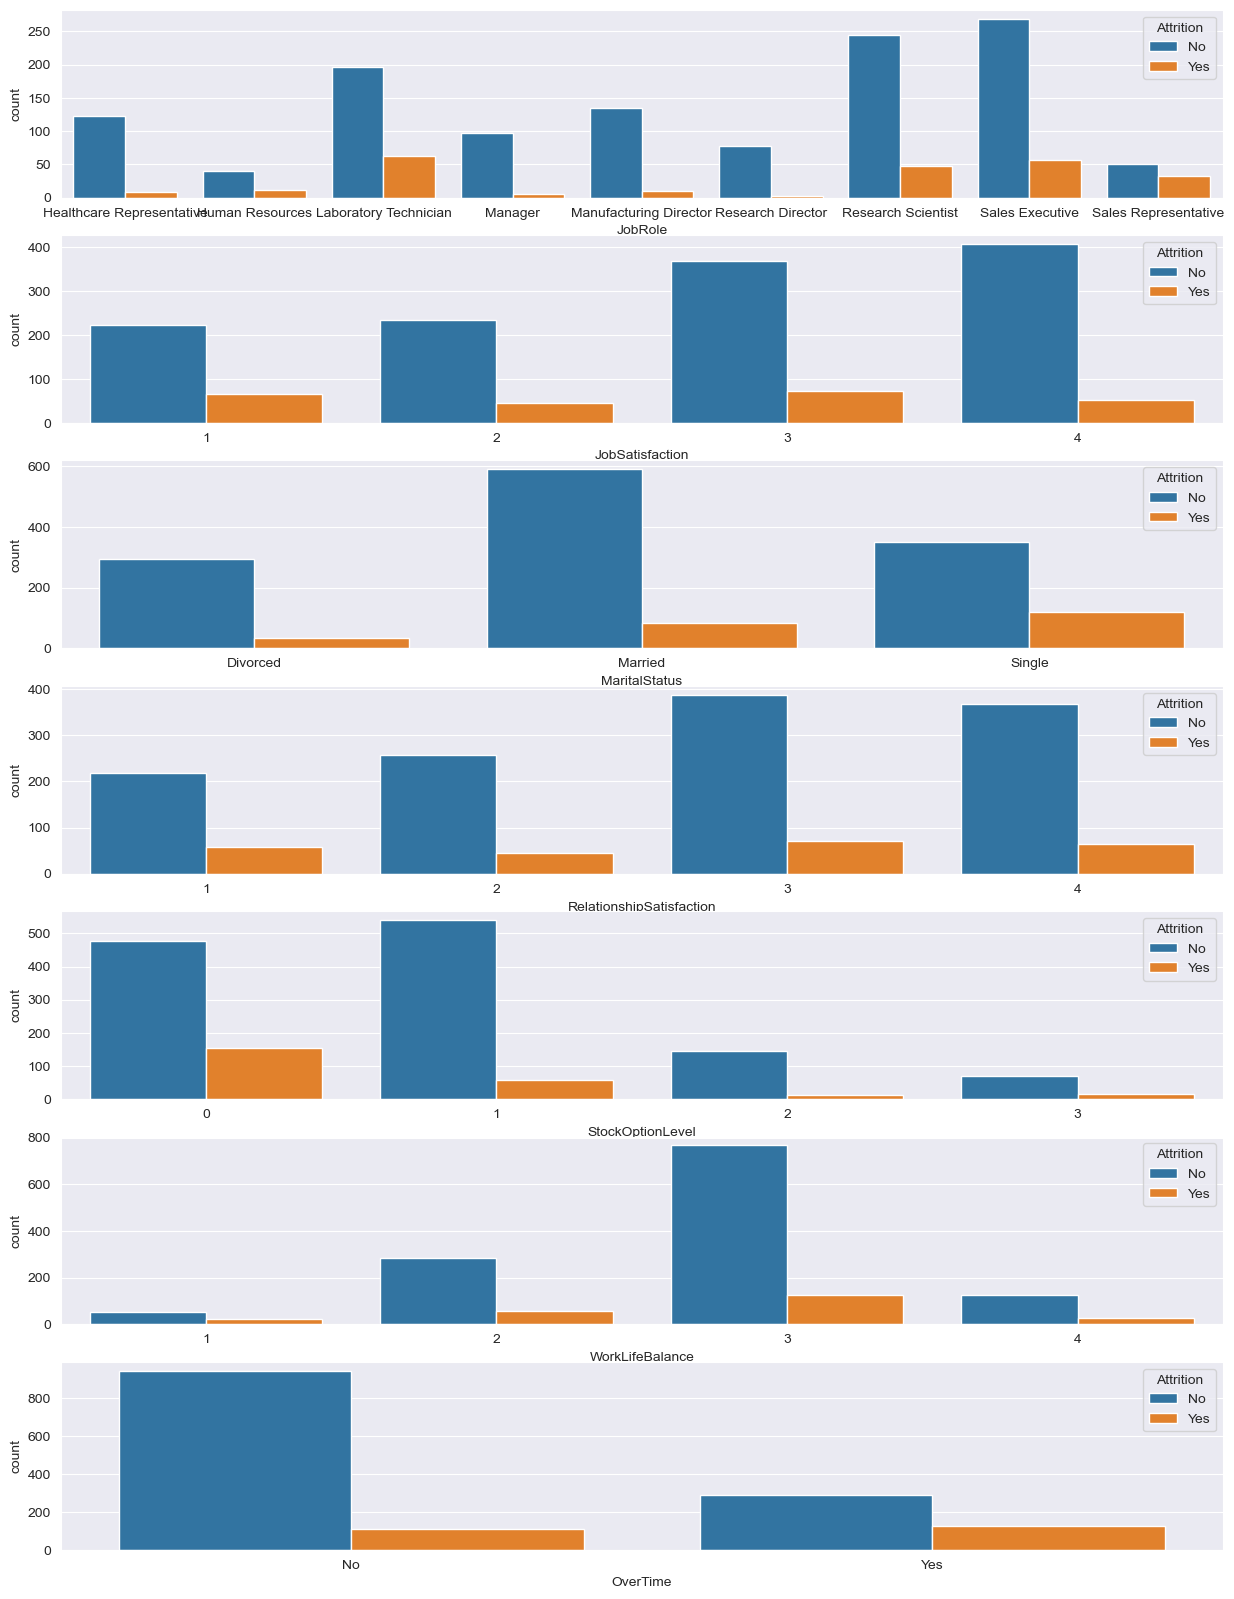

In [7]:
fig,ax = plt.subplots(nrows = 7,figsize = (15,20))

cats_7_14 = categorical_features[8:]
for category in cats_7_14 :
    indx = cats_7_14.index(category)
    sns.countplot(data = attrition_df,
              x = category,
              ax = ax[indx],
              hue = 'Attrition')

    

#### Numerical

In [8]:
attrition_df.describe()

Age  DistanceFromHome   HourlyRate  NumCompaniesWorked  \
count  1470.000000       1470.000000  1470.000000         1470.000000   
mean     36.923810          9.192517    65.891156            2.693197   
std       9.135373          8.106864    20.329428            2.498009   
min      18.000000          1.000000    30.000000            0.000000   
25%      30.000000          2.000000    48.000000            1.000000   
50%      36.000000          7.000000    66.000000            2.000000   
75%      43.000000         14.000000    83.750000            4.000000   
max      60.000000         29.000000   100.000000            9.000000   

       PercentSalaryHike  PerformanceRating  TotalWorkingYears  \
count        1470.000000        1470.000000        1470.000000   
mean           15.209524           3.153741          11.279592   
std             3.659938           0.360824           7.780782   
min            11.000000           3.000000           0.000000   
25%            12.000000           3.000000           6.000000   
50%            14.000000           3.000000          10.000000   
75%            18.000000           3.000000          15.000000   
max            25.000000           4.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1470.000000     1470.000000         1470.000000   
mean                2.799320        7.008163            4.229252   
std                 1.289271        6.126525            3.623137   
min                 0.000000        0.000000            0.000000   
25%                 2.000000        3.000000            2.000000   
50%                 3.000000        5.000000            3.000000   
75%                 3.000000        9.000000            7.000000   
max                 6.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000

### Unscaled viz

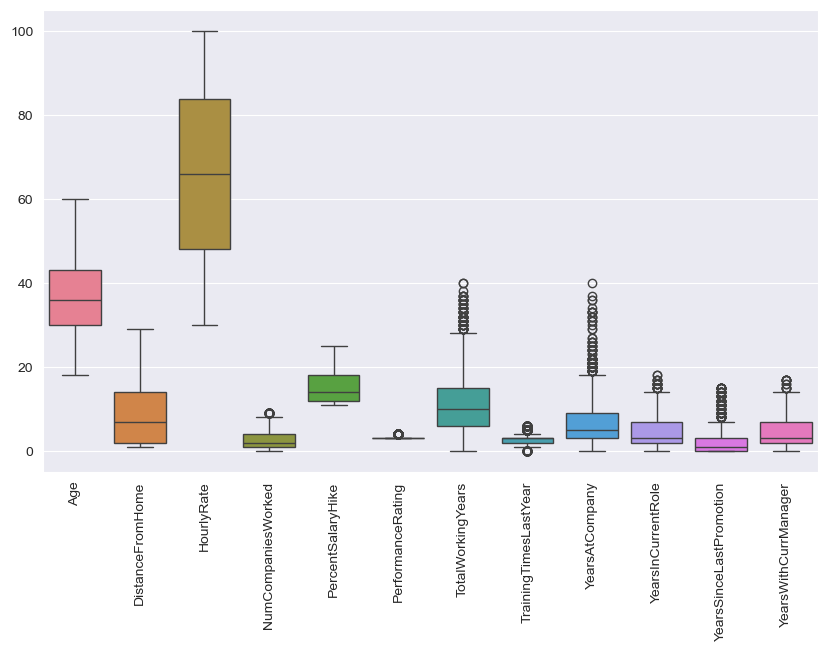

In [9]:
fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(
            attrition_df,
            ax = ax
            )

plt.xticks(rotation=90)

plt.show()

### Encoded variables

In [10]:
le = LabelEncoder()

In [11]:
encoded_df = attrition_df.copy()

for category in categorical_features:
    encoded_df[category] = le.fit_transform(encoded_df[category])

In [12]:
encoded_df.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   41          1               2           2                 1          1   
1   49          0               1           1                 8          0   
2   37          1               2           1                 2          1   
3   33          0               1           1                 3          3   
4   27          0               2           1                 2          0   

   EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        1          94               2  ...   
1               1                        2          61               1  ...   
2               4                        3          92               1  ...   
3               1                        3          56               2  ...   
4               3                        0          40               2  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         0                 0   
1                  4                         3                 1   
2                  3                         1                 0   
3                  3                         2                 0   
4                  3                         3                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                0               6   
1                 10                      3                2              10   
2                  7                      3                2               0   
3                  8                      3                2               8   
4                  6                      3                2               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 27 columns]

### Correlation

In [13]:
corr_df = encoded_df.corr()
corr_df.head()

Age  Attrition  BusinessTravel  Department  \
Age               1.000000  -0.159205        0.024751   -0.031882   
Attrition        -0.159205   1.000000        0.000074    0.063991   
BusinessTravel    0.024751   0.000074        1.000000   -0.009044   
Department       -0.031882   0.063991       -0.009044    1.000000   
DistanceFromHome -0.001686   0.077924       -0.024469    0.017225   

                  DistanceFromHome  Education  EducationField  \
Age                      -0.001686   0.208034       -0.040873   
Attrition                 0.077924  -0.031373        0.026846   
BusinessTravel           -0.024469   0.000757        0.023724   
Department                0.017225   0.007996        0.013720   
DistanceFromHome          1.000000   0.021042        0.002013   

                  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
Age                              0.010146    0.024287        0.029820  ...   
Attrition                       -0.103369   -0.006846       -0.130016  ...   
BusinessTravel                   0.004174    0.026528        0.039062  ...   
Department                      -0.019395   -0.004144       -0.024586  ...   
DistanceFromHome                -0.016075    0.031131        0.008783  ...   

                  PerformanceRating  RelationshipSatisfaction  \
Age                        0.001904                  0.053535   
Attrition                  0.002889                 -0.045872   
BusinessTravel            -0.026341                 -0.035986   
Department                -0.024604                 -0.022414   
DistanceFromHome           0.027110                  0.006557   

                  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Age                       0.037510           0.680381              -0.019621   
Attrition                -0.137145          -0.171063              -0.059478   
BusinessTravel           -0.016727           0.034226               0.015240   
Department               -0.012193          -0.015762               0.036875   
DistanceFromHome          0.044872           0.004628              -0.036942   

                  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Age                     -0.021490        0.311309            0.212901   
Attrition               -0.063939       -0.134392           -0.160545   
BusinessTravel          -0.011256       -0.014575           -0.011497   
Department               0.026383        0.022920            0.056315   
DistanceFromHome        -0.026556        0.009508            0.018845   

                  YearsSinceLastPromotion  YearsWithCurrManager  
Age                              0.216513              0.202089  
Attrition                       -0.033019             -0.156199  
BusinessTravel                  -0.032591             -0.022636  
Department                       0.040061              0.034282  
DistanceFromHome                 0.010029              0.014406  

[5 rows x 27 columns]

### Viz

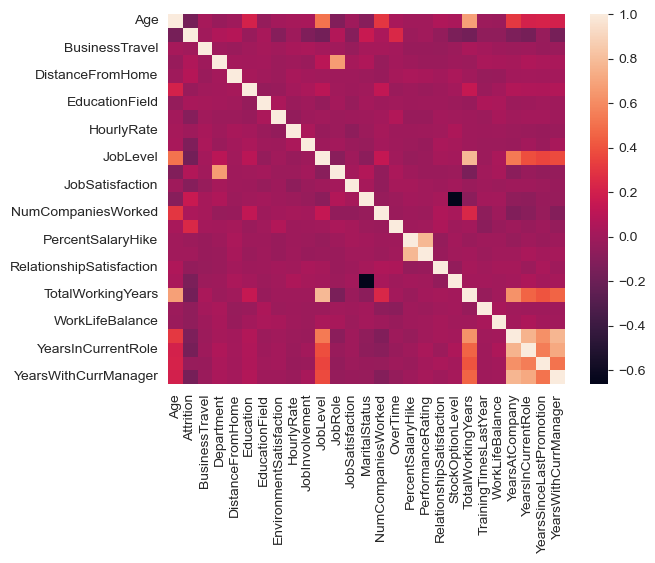

In [14]:
sns.heatmap(corr_df)
plt.show()

#### Inspecting correlations

In [15]:
inspect_df =corr_df.stack().reset_index()
inspect_df.head()

level_0           level_1         0
0     Age               Age  1.000000
1     Age         Attrition -0.159205
2     Age    BusinessTravel  0.024751
3     Age        Department -0.031882
4     Age  DistanceFromHome -0.001686

#### Highest correlations

In [16]:
sort_df = inspect_df.sort_values(by = 0, ascending = False)
high_corr = sort_df[sort_df['level_0'] != sort_df['level_1']]
display(high_corr.head(10))
display(high_corr.tail(10))

level_0               level_1         0
290              JobLevel     TotalWorkingYears  0.782208
550     TotalWorkingYears              JobLevel  0.782208
449     PercentSalaryHike     PerformanceRating  0.773550
475     PerformanceRating     PercentSalaryHike  0.773550
725  YearsWithCurrManager        YearsAtCompany  0.769212
647        YearsAtCompany  YearsWithCurrManager  0.769212
645        YearsAtCompany    YearsInCurrentRole  0.758754
671    YearsInCurrentRole        YearsAtCompany  0.758754
674    YearsInCurrentRole  YearsWithCurrManager  0.714365
726  YearsWithCurrManager    YearsInCurrentRole  0.714365

level_0             level_1         0
1                   Age           Attrition -0.159205
27            Attrition                 Age -0.159205
51            Attrition  YearsInCurrentRole -0.160545
649  YearsInCurrentRole           Attrition -0.160545
271            JobLevel           Attrition -0.169105
37            Attrition            JobLevel -0.169105
47            Attrition   TotalWorkingYears -0.171063
541   TotalWorkingYears           Attrition -0.171063
526    StockOptionLevel       MaritalStatus -0.662577
370       MaritalStatus    StockOptionLevel -0.662577

In [17]:
indx = high_corr[(high_corr[0]<0.70)&(high_corr[0]>-0.7)].index
high_corr.drop(indx,inplace = True)
high_corr.drop_duplicates(subset=0,inplace = True)

high_corr

C:\Users\Chris\AppData\Local\Temp\ipykernel_13908\410080458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_corr.drop(indx,inplace = True)
C:\Users\Chris\AppData\Local\Temp\ipykernel_13908\410080458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_corr.drop_duplicates(subset=0,inplace = True)


level_0               level_1         0
290              JobLevel     TotalWorkingYears  0.782208
449     PercentSalaryHike     PerformanceRating  0.773550
725  YearsWithCurrManager        YearsAtCompany  0.769212
645        YearsAtCompany    YearsInCurrentRole  0.758754
674    YearsInCurrentRole  YearsWithCurrManager  0.714365

### Dropping Highly Correlated Columns 
   **Threshold for positively correlated is > 0.7**<br>
   **Threshold for negatively correlated is < -0.7**

In [18]:
drop_list_0= high_corr['level_0']
drop_list_1= high_corr['level_1']

intersection = drop_list_0[drop_list_0.isin(drop_list_1)]
intersection

725    YearsWithCurrManager
645          YearsAtCompany
674      YearsInCurrentRole
Name: level_0, dtype: object

In [19]:
drop_list_1.drop(high_corr[high_corr['level_1']=='YearsWithCurrManager'].index,inplace = True)
drop_list = drop_list_1.to_numpy()
drop_list

C:\Users\Chris\AppData\Local\Temp\ipykernel_13908\2478749689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_list_1.drop(high_corr[high_corr['level_1']=='YearsWithCurrManager'].index,inplace = True)


array(['TotalWorkingYears', 'PerformanceRating', 'YearsAtCompany',
       'YearsInCurrentRole'], dtype=object)

In [20]:
encoded_df.drop(columns = drop_list,inplace = True)
encoded_df.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   41          1               2           2                 1          1   
1   49          0               1           1                 8          0   
2   37          1               2           1                 2          1   
3   33          0               1           1                 3          3   
4   27          0               2           1                 2          0   

   EducationField  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        1          94               2  ...   
1               1                        2          61               1  ...   
2               4                        3          92               1  ...   
3               1                        3          56               2  ...   
4               3                        0          40               2  ...   

   MaritalStatus  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0              2                   8         1                 11   
1              1                   1         0                 23   
2              2                   6         1                 15   
3              1                   1         1                 11   
4              1                   9         0                 12   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                         0                 0                      0   
1                         3                 1                      3   
2                         1                 0                      3   
3                         2                 0                      3   
4                         3                 1                      3   

   WorkLifeBalance  YearsSinceLastPromotion  YearsWithCurrManager  
0                0                        0                     5  
1                2                        1                     7  
2                2                        0                     0  
3                2                        3                     0  
4                2                        2                     2  

[5 rows x 23 columns]

### Target

#### Attrition

In [21]:
y_attrition = encoded_df[['Attrition']]
y_attrition.head()

Attrition
0          1
1          0
2          1
3          0
4          0

#### Balance

<Axes: xlabel='Attrition', ylabel='count'>

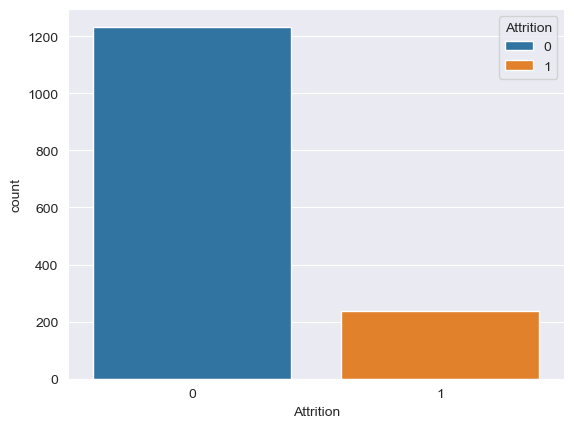

In [22]:
sns.countplot(data=y_attrition,
             x = 'Attrition',
             hue = 'Attrition')

#### Department

In [23]:
y_dept = encoded_df[['Department']]
y_dept.head()

Department
0           2
1           1
2           1
3           1
4           1

#### Balance

<Axes: xlabel='Department', ylabel='count'>

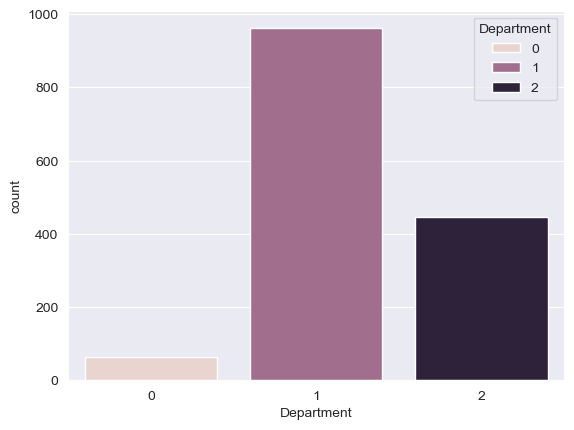

In [24]:
sns.countplot(data=y_dept,
             x = 'Department',
             hue = 'Department')

### Predictors

In [25]:
X = encoded_df.drop(columns = ['Attrition','Department'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EducationField            1470 non-null   int32
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobRole                   1470 non-null   int32
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int32
 12  NumCompaniesWorked        1470 non-null   int64
 13  OverTime                  1470 non-null   int32
 14  PercentSalaryHike         1470 non-null 

### Splitting Data

In [26]:
X_train,X_test,y_train_attrition,y_test_attrition,y_train_dept,y_test_dept = train_test_split(X,y_attrition,y_dept,
                                                 random_state = 42)

### Scaling

In [27]:
numerical = attrition_df.drop(columns = categorical_features)
numerical.drop(columns = ['PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole'],inplace = True)

X_train_numerical = X_train[numerical.columns]
X_test_numerical = X_test[numerical.columns]

In [28]:
scaler = StandardScaler()

X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

### Viz

C:\Users\Chris\AppData\Local\Temp\ipykernel_13908\3829657024.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = ax[1]).set(


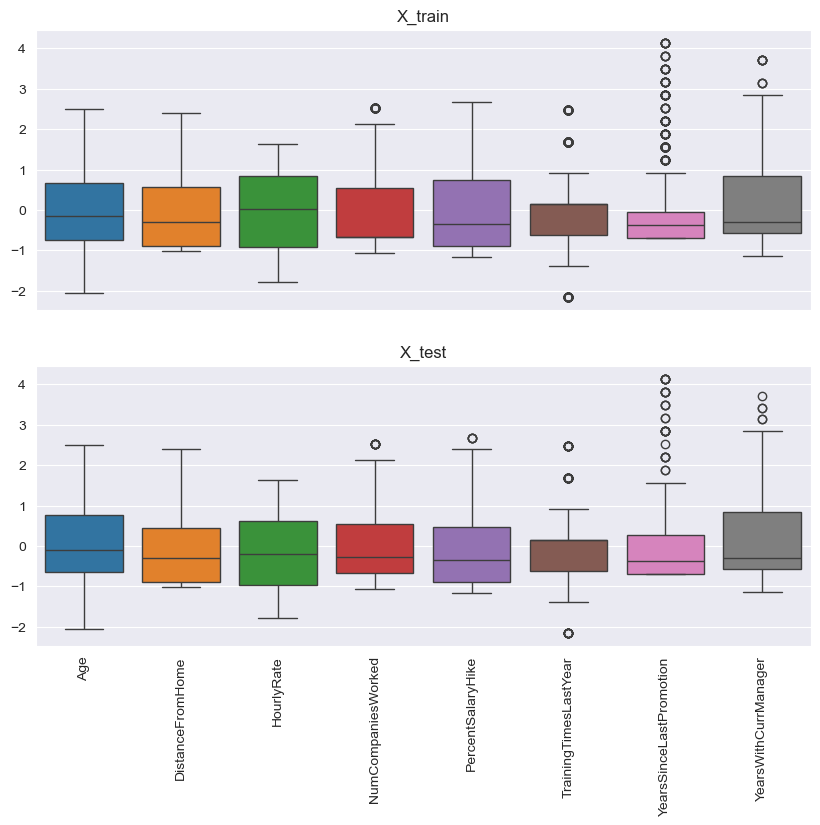

In [29]:
fig,ax = plt.subplots(
                      nrows =2, 
                      ncols =1,
                      figsize = (10,8),
                      sharex = True
                     )


sns.boxplot(X_train_numerical_scaled,
            ax = ax[0]).set_title('X_train')

sns.boxplot(X_test_numerical_scaled,
            ax = ax[1]).set(
                            xticklabels = numerical.columns,
                            title = 'X_test',
                            
                            )


plt.xticks(rotation=90)


plt.show()

In [30]:
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled,columns = numerical.columns)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled,columns = numerical.columns)

X_train.drop(columns = numerical.columns,inplace = True)
X_test.drop(columns = numerical.columns,inplace = True)

X_train_numerical_scaled_df.set_index(X_train.index,inplace = True)
X_test_numerical_scaled_df.set_index(X_test.index,inplace = True)

X_train = pd.concat([X_train,X_train_numerical_scaled_df],axis=1)
X_test = pd.concat([X_test,X_test_numerical_scaled_df],axis=1)

## Create, Compile, and Train the Model

#### Input Dimensions

In [31]:
input_dim = X_train.columns.size
input_dim

21

In [66]:
y_train_dept.shape[1]

1

In [72]:
#Input layer
input_layer = layers.Input(shape=(input_dim), name='input_features')

#Shared layers
shared_layer1 = layers.Dense(64, activation='relu',name='shared_layer1')(input_layer)
shared_layer2 = layers.Dense(128, activation='relu',name='shared_layer2')(shared_layer1)

#Hidden layers
dept_hidden = layers.Dense(64, activation='softmax', name='dept_hidden')(shared_layer2)
attrition_hidden = layers.Dense(32, activation='sigmoid', name= 'attrition_hidden')(shared_layer2)

#Output layers
dept_output = layers.Dense(y_train_dept.shape[1], activation='softmax', name='dept_output')(dept_hidden)
attrition_output = layers.Dense(y_train_attrition.shape[1], activation='sigmoid', name= 'attrition_output')(attrition_hidden)

#Model
model = Model(inputs=input_layer, outputs=[dept_output, attrition_output])

#Compile
model.compile(optimizer='adam',
              loss={'dept_output': 'categorical_crossentropy', 'attrition_output': 'binary_crossentropy'},
              metrics={'dept_output': 'accuracy', 'attrition_output': 'accuracy'})

#Summary
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 21)]                 0         []                            
 )                                                                                                
                                                                                                  
 shared_layer1 (Dense)       (None, 64)                   1408      ['input_features[0][0]']      
                                                                                                  
 shared_layer2 (Dense)       (None, 128)                  8320      ['shared_layer1[0][0]']       
                                                                                                  
 dept_hidden (Dense)         (None, 64)                   8256      ['shared_layer2[0][0]'] 

### Training Model

In [73]:
history = History()

model.fit(
    X_train,
    {'attrition_output': y_train_attrition, 'dept_output': y_train_dept},
    epochs=50,
    batch_size=32,
    callbacks = [history]
)


Epoch 1/50


C:\Users\Chris\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


35/35 [==============================] - 3s 4ms/step - loss: 0.4717 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.4717 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.8285
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.4378 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.4378 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.8285
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3982 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.3982 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.8330
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3726 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.3726 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.8521
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.3520 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.3520 - dept_output_accuracy: 0.6543 - 

35/35 [==============================] - 0s 7ms/step - loss: 0.1203 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.1203 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.9646
Epoch 41/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1111 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.1111 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.9719
Epoch 42/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1079 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.1079 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.9746
Epoch 43/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1148 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.1148 - dept_output_accuracy: 0.6543 - attrition_output_accuracy: 0.9673
Epoch 44/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1013 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.1013 - dept_output_accuracy: 0.654

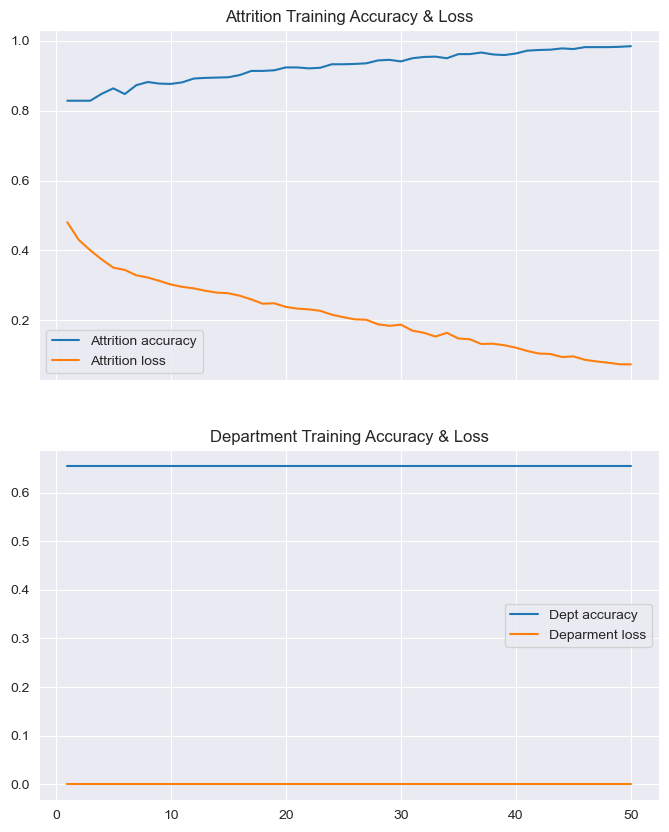

In [71]:
attrition_accuracy = history.history['attrition_output_accuracy']
attrition_loss = history.history['attrition_output_loss']

dept_accuracy = history.history['dept_output_accuracy']
dept_loss = history.history['dept_output_loss']

loss = history.history['loss']
epochs = np.arange(1,51)

fig,ax = plt.subplots(nrows=2,sharex = True,figsize = (8,10))

sns.lineplot(
             x = epochs,
             y = attrition_accuracy,
             label = 'Attrition accuracy',
             ax = ax[0]).set_title('Attrition Training Accuracy & Loss')

sns.lineplot(
             x = epochs,
             y = attrition_loss,
             label = 'Attrition loss',
             ax = ax[0])


sns.lineplot(
             x = epochs,
             y = dept_accuracy,
             label = 'Dept accuracy',
             ax = ax[1]).set_title('Department Training Accuracy & Loss')

sns.lineplot(
             x = epochs,
             y = dept_loss,
             label = 'Deparment loss',
             ax = ax[1])



plt.show()

### Model Evaluation

In [46]:
# Evaluate the model with the testing data
preds = model.evaluate(np.array(X_test), {
        'attrition_output': y_test_attrition,
        'dept_output': y_test_dept,
        
    })

C:\Users\Chris\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 1s 8ms/step - loss: 0.3306 - dept_output_loss: 0.0000e+00 - attrition_output_loss: 0.3306 - dept_output_accuracy: 0.6522 - attrition_output_accuracy: 0.8723


### Accuracies

In [43]:
print(f'Department predictions accuracy: {preds[3]}')
print(f'Attrition predictions accuracy: {preds[4]}')

Department predictions accuracy: 0.6521739363670349
Attrition predictions accuracy: 0.8695651888847351


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. 
2. 
3. 